In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets


In [2]:
# Load the Iris dataset
url = "https://bit.ly/3kXTdox"
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Find the optimal number of clusters using the Elbow Method
sse = []  # Sum of Squared Errors
K_range = range(1, 11)  # Test different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

C:\Users\tkrsa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tkrsa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tkrsa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tkrsa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

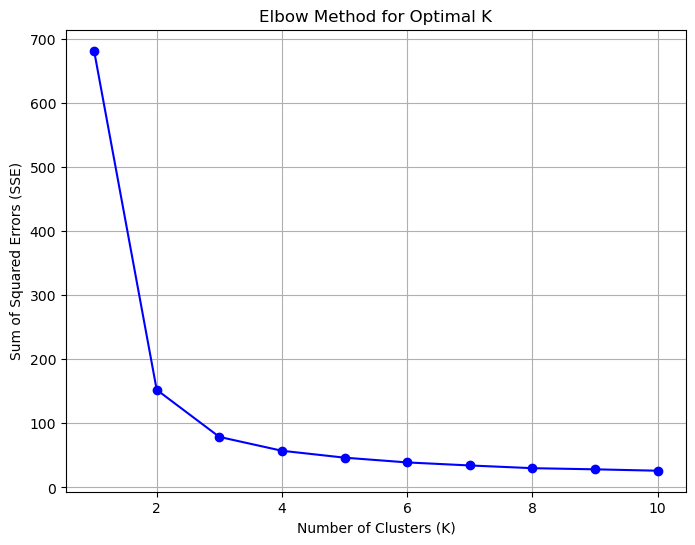

In [5]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid()
plt.show()

# From the graph, select the optimal K (number of clusters)
optimal_k = 3  # In this case, it's clear that K=3 is a good choice


In [6]:
# Perform K-means clustering with the selected K
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(data)


C:\Users\tkrsa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tkrsa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
# Add the cluster labels to the dataset
data['Cluster'] = cluster_labels

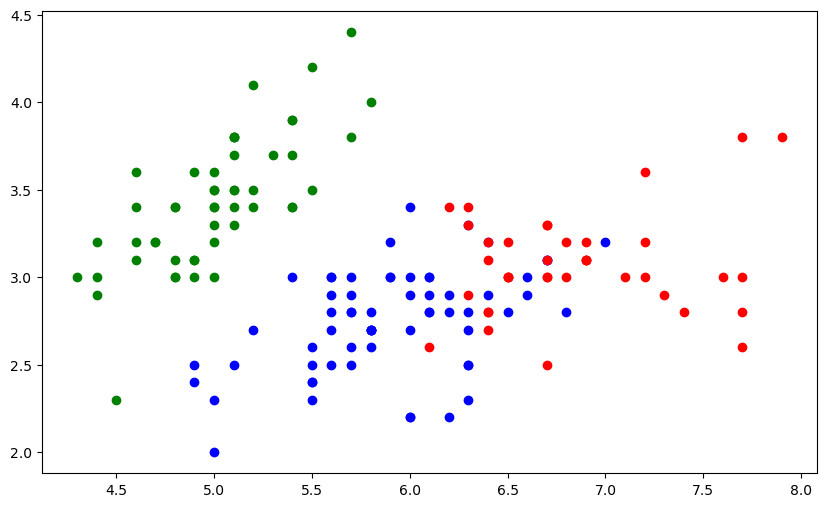

In [8]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']
for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['sepal length (cm)'], cluster_data['sepal width (cm)'],
                label=f'Cluster {i}', c=colors[i])


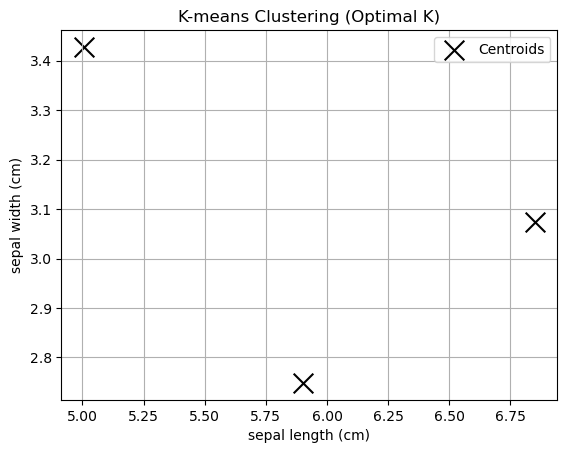

In [10]:
# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, color='k', label='Centroids')
plt.title('K-means Clustering (Optimal K)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.grid()
plt.show()